# Блок №3 Проект

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам [данные](https://disk.yandex.ru/d/c4t6B6OFDANVbg) за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

# Задания
1. Загрузите [данные](https://disk.yandex.ru/d/c4t6B6OFDANVbg), проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

# Описание данных
+ timestamp – дата и время (точность до часа)
+ cnt – количество аренд велосипедов за этот час
+ t1 – температура, в С
+ t2 – температура "ощущается как", в С 
+ hum – влажность (%)
+ wind_speed – скорость ветра, км/ч
+ weather_code – погодные условия:
 + 1 – ясно (SKC)
 + 2 – преимущественно ясно / встречаются отдельные облака (SCT)
 + 3 – облачно / значительные облака (BKN)
 + 4 – пасмурно (OVC)
 + 7 – небольшой дождь Rain/ light Rain shower/ Light rain 
 + 10 – дождь с грозой
 + 26 – снегопад 
 + 94 – ледяной туман (да, такое бывает!)
+ isholiday – является ли день праздником (1 – праздник, 0 – нет)
+ isweekend –  является ли день выходным (1 – выходной, 0 – нет)
+ season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

# Задание 1
___
Загрузите [данные](https://disk.yandex.ru/d/c4t6B6OFDANVbg), проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

Варианты ответа:
+ Нет
+ Да, во многих
+ Да, но совсем немного

In [3]:
# Считаем данные, дополнительно распарсим даты
df = pd.read_csv('/home/jupyter-a.stamati-16/Statistic/london.csv', parse_dates=['timestamp'])

In [4]:
# Посмотрим на данные
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
# Посмотрим на размер таблицы
df.shape

(17414, 10)

In [7]:
# Проверим тип данных
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
# Проверим наличие пустых значений
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Ответ:
+ нет

# Задание 2
___
Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

+ по оси x – дата (timestamp)
+ по оси y – число поездок (cnt)

Выберите верные утверждения:
+ Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды
+ В выходные поездок точно меньше, чем в будние дни
+ Случались только аномальные скачки вверх, вниз ничего не падало

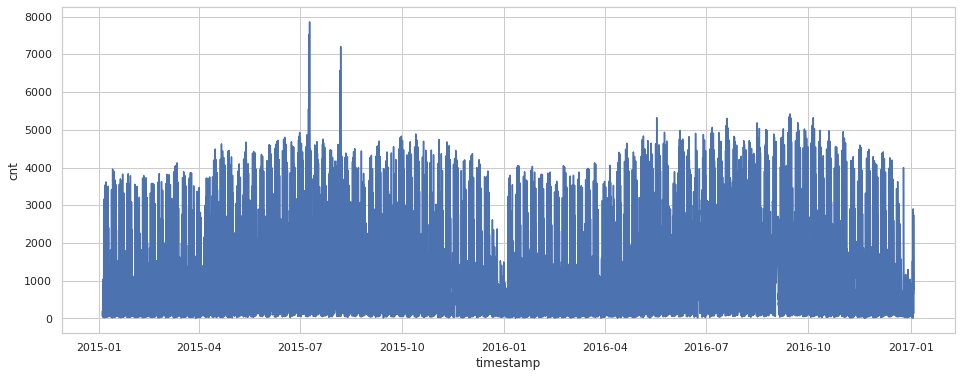

In [10]:
sns.lineplot(data=df, x='timestamp', y='cnt');

Ответ:
+ Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды

# Задание 3

Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:
```
data.resample(rule='D').column_name.sum() #способ 1
data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный первому
```
Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

Выберите варианты ответа:
+ Максимальное число аренд за день – более 1 000 000
+ Максимальное число аренд за день не превышало 8 000
+ Число аренд зимой и летом никак не различается
+ Максимальное число аренд за день составляет более 70 000
+ Встречаются только резкие скачки вверх
+ Зимой число аренд меньше, чем летом
+ Встречаются как очень резкие скачки числа аренд, так и падения

In [11]:
# Произведем необходимые преобразования
df_sum_cmt_per_day = df \
                        .sort_values('timestamp') \
                        .set_index('timestamp') \
                        .resample(rule='D') \
                        .agg({'cnt':'sum'})
df_sum_cmt_per_day

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


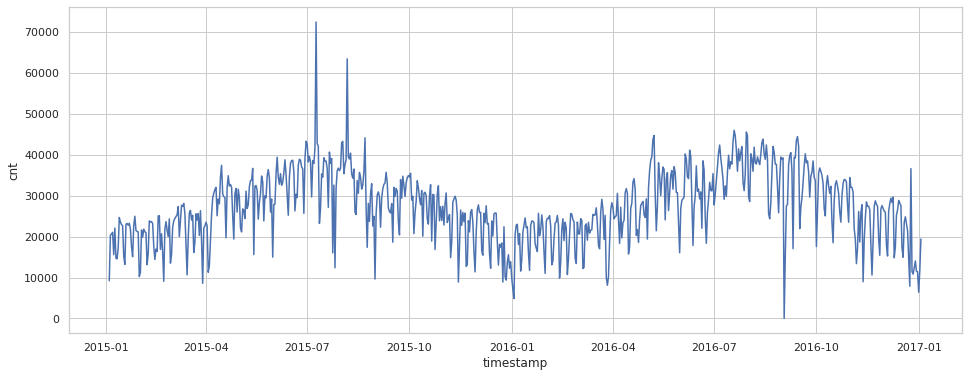

In [12]:
# Визуализируем преобразованные данные
sns.lineplot(data=df_sum_cmt_per_day, x='timestamp', y='cnt');

Ответ:
+ Максимальное число аренд за день составляет более 70 000
+ Зимой число аренд меньше, чем летом
+ Встречаются как очень резкие скачки числа аренд, так и падения

# Задание 4
___
Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

+ сначала посчитаем скользящее среднее, чтобы сгладить ряд
+ далее – разницу между наблюдаемыми и сглаженными значениями
+ определим верхние и нижние границы 99% доверительного интервала 
+ найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [23]:
# Посчиатем скользящее среднее
df_windom3_mean = df_sum_cmt_per_day \
                                .rolling(window=3) \
                                .mean()
df_windom3_mean

,cnt
timestamp,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,16739.666667
2015-01-07,20683.000000
2015-01-08,19092.666667
...,...
2016-12-30,12682.000000
2016-12-31,12347.333333
2017-01-01,9803.666667


In [14]:
# Найдем ответ на задачу
df_windom3_mean \
                .query('timestamp == "2015-07-09"') \
                .round(0)

,cnt
timestamp,
2015-07-09,50705.0


# Задание 5
___
Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:
```
c = a - b
std = np.std(c)
```
В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [15]:
# Посчитаем разницу между наблюдаемыми и подсчитанными скользящими средними
df_difference = df_sum_cmt_per_day - df_windom3_mean

df_difference

,cnt
timestamp,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,3873.333333
2015-01-07,381.000000
2015-01-08,-3491.666667
...,...
2016-12-30,-1116.000000
2016-12-31,-923.333333
2017-01-01,-3382.666667


In [18]:
# Посчитаем стандартное отклонение для разницы
df_std = np.std(df_difference)

df_std

cnt    4558.586641
dtype: float64

In [17]:
# Округлим полученное стандартное отклонение до двух знаков после запятой
round(df_std, 2)

cnt    4558.59
dtype: float64

# Задание 6
___
Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

+ upper_bound – верхняя граница; к средним прибавляем $2.576∗std$
+ lower_bound – нижняя граница; вычитаем $2.576∗std$

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

In [25]:
# Данные полученные, при расчете скользящего среднего
df_windom3_mean.head()

,cnt
timestamp,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,16739.666667
2015-01-07,20683.000000
2015-01-08,19092.666667


In [26]:
# Создадим колонку с верхней границей
df_windom3_mean['upper_bound'] = df_windom3_mean['cnt'] + 2.576 * df_std['cnt']

In [27]:
# Создадим колонку с нижней границей
df_windom3_mean['lower_bound'] = df_windom3_mean['cnt'] - 2.576 * df_std['cnt']

In [29]:
# Посмотрим на результат
df_windom3_mean.head()

,cnt,upper_bound,lower_bound
timestamp,,,
2015-01-04,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,16739.666667,28482.585854,4996.747479
2015-01-07,20683.000000,32425.919188,8940.080812
2015-01-08,19092.666667,30835.585854,7349.747479


In [30]:
# Найдем ответ на задачу
round(df_windom3_mean.loc["2017-01-03",'upper_bound'], 2)

24302.92

# Задание 7

И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [33]:
# Объеденим данные и переименуем колонки
df_general = df_sum_cmt_per_day.merge(df_windom3_mean, on=['timestamp']) \
                                .rename(columns={'cnt_x' : 'cnt',
                                                'cnt_y' : 'cnt_window'})

df_general

,cnt,cnt_window,upper_bound,lower_bound
timestamp,,,,
2015-01-04,9234,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN
2015-01-06,20613,16739.666667,28482.585854,4996.747479
2015-01-07,21064,20683.000000,32425.919188,8940.080812
2015-01-08,15601,19092.666667,30835.585854,7349.747479
...,...,...,...,...
2016-12-30,11566,12682.000000,24424.919188,939.080812
2016-12-31,11424,12347.333333,24090.252521,604.414146
2017-01-01,6421,9803.666667,21546.585854,-1939.252521


In [40]:
# Отберем значения, где они оказались больше верхней границы
df_general_query = df_general.query('cnt > upper_bound')

df_general_query

,cnt,cnt_window,upper_bound,lower_bound
timestamp,,,,
2015-07-09,72504,50705.000000,62447.919188,38962.080812
2015-08-06,63468,46627.333333,58370.252521,34884.414146
2016-09-04,27512,14259.000000,26001.919188,2516.080812
2016-12-25,36653,19650.666667,31393.585854,7907.747479


In [41]:
# Найдем ответ на задачу
df_general_query \
            .cnt \
            .idxmax()

Timestamp('2015-07-09 00:00:00')

# Задание 8

Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

В качестве ответа выберите наиболее вероятную причину столь резкого скачка:
+ Забастовки в метро
+ Ошибка при сборе данных
+ Погода
+ Выборы
+ Ветер

In [43]:
# Посмотрим на данные в аномальный день
df \
    .query('timestamp > "2015-07-09 00:00:00" and timestamp < "2015-07-10 00:00:00"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4454,2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0
4455,2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0
4456,2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0
4457,2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0
4458,2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0
4459,2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0
4460,2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
4462,2015-07-09 09:00:00,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0
4463,2015-07-09 10:00:00,2760,16.5,16.5,50.5,10.0,2.0,0.0,0.0,1.0


Овтет:
+ [Забастовки в метро](https://www.bbc.com/russian/international/2015/07/150709_london_tube_strike)

# Задание 9

Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

Варианты ответов:
+ Пробки
+ Ветер
+ Погода
+ Забастовки
+ Выборы
+ Ошибка при сборе данных

In [45]:
# Посмотрми на данные, когда число аренд, меньше ожидаемого
df_general.query('cnt < lower_bound')

,cnt,cnt_window,upper_bound,lower_bound
timestamp,,,,
2015-05-14,15609,28709.333333,40452.252521,16966.414146
2015-07-12,23240,36036.666667,47779.585854,24293.747479
2015-07-24,16034,31013.666667,42756.585854,19270.747479
2015-08-24,17400,29529.333333,41272.252521,17786.414146
2015-11-14,8898,21037.333333,32780.252521,9294.414146
2016-09-02,0,26086.333333,37829.252521,14343.414146
2016-09-10,17080,31262.000000,43004.919188,19519.080812
2016-09-16,21967,36193.333333,47936.252521,24450.414146
2016-11-12,8990,20878.000000,32620.919188,9135.080812


In [47]:
# Найдем день, когда разница максимальная
df_general.query('cnt < lower_bound') \
            .cnt \
            .idxmax()

Timestamp('2015-07-12 00:00:00')

In [50]:
# Посмотрим на данные в этот день
df \
    .query('timestamp > "2016-09-02 00:00:00" and timestamp < "2016-09-03 00:00:00"')
# Мы не наблюдаем вообще никаких записей в таблице в этот день

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


Ответ:
+ Ошибка при сборе данных